# * Imputation Strategies for Handling Missing Data:*
### *There are various methods to impute missing values in python such as:*
#### 1-Drop Missing Values
#### 2-Mean Imputation
#### 3-Median Imputation
#### 4-Mode Imputation
#### 5-Constant Value Imputation
#### 6-Linear Interpolation 
#### 7- K-Nearest Neighbours (KNN) Imputation
#### 8- Multivariate Imputation
#### 8(i)-  Iterative Imputation 8(ii)- Multiple Imputaion by Chained Equations (MICE)


In [68]:
# 1- Drop Missing Values

# import libraries and load dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [70]:
df.isnull().sum()/len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [71]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [72]:
df.drop(columns='deck', inplace=True)


In [73]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<Axes: ylabel='age'>

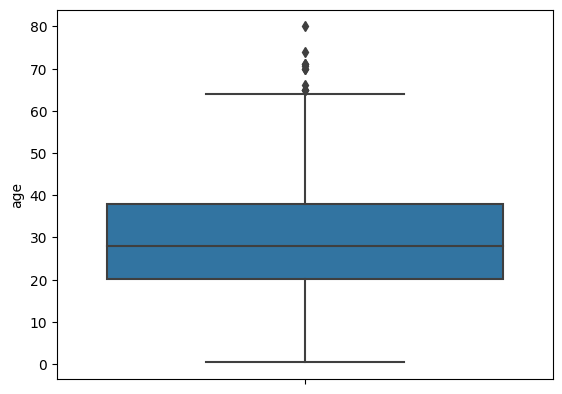

In [74]:
sns.boxplot(data=df, y='age')

<Axes: >

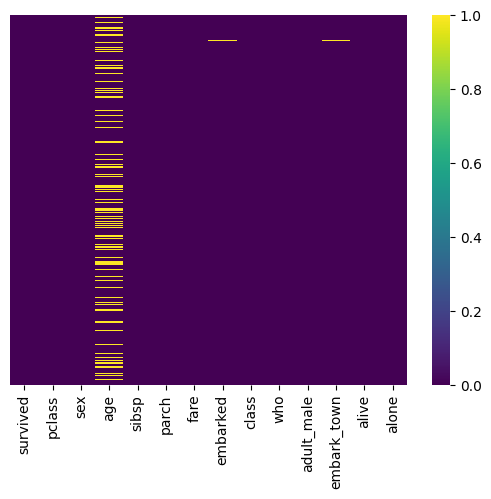

In [75]:
# visualize the nan value in Heatmap

sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')



#### 2-Mean Imputation
#### 3-Median Imputation
#### 4-Mode Imputation

In [78]:
# Mean,Median and Mode Imputation using SciKit learn

!pip install scikit-learn 

In [79]:
# Import libraries

import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [80]:
# Load the Titanic dataset

titanic_data = sns.load_dataset("titanic")

# Select the relevant Columns containing missing values

columns_with_nulls = ["age", "fare"]

# Create a new DataFrame with the selected columns
data = titanic_data[columns_with_nulls].copy()

# Print the number of missing values in the selected columns
print("Missing Values in the data:\n", data.isnull().sum())

Missing Values in the data:
 age     177
fare      0
dtype: int64


In [82]:
# Imputation of Missing Value wih mean strategy
mean_imputer = SimpleImputer(strategy= 'mean')
mean_imputed_data = mean_imputer.fit_transform(data)

In [83]:
# Imputation of Missing Value with median Strategy
median_imputer = SimpleImputer(strategy= 'median')
median_imputed_data = median_imputer.fit_transform(data)

In [89]:

# Imputation of Missing Value with mode Strategy
mode_frequent_imputer = SimpleImputer(strategy= 'most_frequent')
most_frequent_imputed_data = mode_frequent_imputer.fit_transform(data)


In [90]:
# Replace null Values in the original DataFrame with new Columns

# Run the cells that define mean_imputed_data, median_imputed_data, and mode_imputed_data first
titanic_data[['age_mean', 'fare_mean']] = mean_imputed_data
titanic_data[['age_median', 'fare_median']] = median_imputed_data
titanic_data[['age_most_frequent', 'fare_most_frequent']] = most_frequent_imputed_data

# Print a Separation Line

print("====================================================================================\n")

# print the missing values

print("Missing values in the imputed_data:\n", titanic_data.isnull().sum()) 

# print the modified DataFrame
print(titanic_data.head())



Missing values in the imputed_data:
 survived                0
pclass                  0
sex                     0
age                   177
sibsp                   0
parch                   0
fare                    0
embarked                2
class                   0
who                     0
adult_male              0
deck                  688
embark_town             2
alive                   0
alone                   0
age_mean                0
fare_mean               0
age_median              0
fare_median             0
age_most_frequent       0
fare_most_frequent      0
dtype: int64
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    

# 5-Constant Value Imputation
Constant value imputation is a basic technique used to fill missing values in a dataset by replacing them with a constant value.

In [93]:


# Load the Titanic dataset
df = sns.load_dataset("titanic")

# Replace missing values in the 'Age' column with a constant value (e.g., -1)
constant_value = -1
df['age'] = df['age'].fillna(constant_value)

# Replace missing values in the 'Age' column with a constant value (e.g., 'Unknown')
constant_value = 'Unknown'
df['age'] = df['age'].fillna(constant_value)

# Print the modified dataset
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# 6-Linear Interpolation
Linear interpolation is a method of filling in missing values by estimating them based on the values of neighboring data points.

In [96]:

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Sort the dataset by 'PassengerId' to ensure proper order
df.sort_values(by='survived', inplace=True)

# Apply linear interpolation to the 'Age' column
df['age'] = titanic_data['age'].interpolate()

# Print the modified dataset
print(df.head())


     survived  pclass   sex    age  sibsp  parch    fare embarked  class  who  \
0           0       3  male  22.00      1      0  7.2500        S  Third  man   
519         0       3  male  32.00      0      0  7.8958        S  Third  man   
521         0       3  male  22.00      0      0  7.8958        S  Third  man   
522         0       3  male  33.00      0      0  7.2250        C  Third  man   
524         0       3  male  42.25      0      0  7.2292        C  Third  man   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton    no  False  
519        True  NaN  Southampton    no   True  
521        True  NaN  Southampton    no   True  
522        True  NaN    Cherbourg    no   True  
524        True  NaN    Cherbourg    no   True  


# 7- KNN Imputation

In [97]:
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

In [98]:
# Load the Titanic dataset

titanic_data = sns.load_dataset("titanic")

# Select the relevant Columns containing missing values

columns_with_nulls = ["age", "fare"]

# Create a new DataFrame with the selected columns
data = titanic_data[columns_with_nulls].copy()

#KNN Imputer

knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNNImputer
knn_imputed_data = knn_imputer.fit_transform(data)

# Replace null Values in the original DataFrame with new Columns

# Run the null values in the original DataFrame with new columns
titanic_data[['age_knn', 'fare_knn']] = knn_imputed_data
titanic_data[['age_knn', 'fare_knn']] = knn_imputed_data

# Print a Separation Line

print("====================================================================================\n")

# print the missing values

print("Missing values in the imputed_data:\n", titanic_data.isnull().sum())


Missing values in the imputed_data:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_knn          0
fare_knn         0
dtype: int64


# 8-Multivariate Imputation
Multivariate imputation is an advanced technique used to fill in missing values in a dataset by considering relationships and patterns among multiple variables. Unlike univariate imputation methods that only consider one variable at a time, multivariate imputation takes into account the interactions and dependencies between different variables to make more accurate estimates of missing values.
Common libraries in Python for performing multivariate imputation include scikit-learn's (8-(i))- IterativeImputer and (8-(ii))- the mice (Multivariate Imputation by Chained Equations) package.

In [99]:
# Iterative Imputation
# import libraries
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [100]:
# Load the Titanic dataset

titanic_data = sns.load_dataset("titanic")

# Select the relevant Columns containing missing values

columns_with_nulls = ["age", "fare"]

# Create a new DataFrame with the selected columns
data = titanic_data[columns_with_nulls].copy()

# Iterative Imputer

Iterative_Imputer = IterativeImputer()
Iterative_Imputed_data = Iterative_Imputer.fit_transform(data)

# Replace null Values in the original DataFrame with new Columns

titanic_data[['age_iterative', 'fare_iterative']] = Iterative_Imputed_data

# Print a Separation Line

print("====================================================================================\n")

# print the missing values

print("Missing values in the imputed_data:\n", titanic_data.isnull().sum())






Missing values in the imputed_data:
 survived            0
pclass              0
sex                 0
age               177
sibsp               0
parch               0
fare                0
embarked            2
class               0
who                 0
adult_male          0
deck              688
embark_town         2
alive               0
alone               0
age_iterative       0
fare_iterative      0
dtype: int64


# 8-(ii) MICE (Multivariate Imputation by Chained Equations)
 "Multivariate Imputation by Chained Equations," is a sophisticated imputation method used to fill in missing values in a dataset. It's based on the idea of iteratively estimating missing values in a multivariate dataset by considering the relationships among variables. MICE assumes that variables in the dataset are related to each other and uses this interdependency to impute missing values more accurately.

In [101]:
pip install fancyimpute


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/c2/8d/57a601819a720b4999017ad614f16fa87a0b8a53d0d28ede273d390f30e9/cvxpy-1.3.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 4.8 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.8 MB 5.8 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
     ---- ----------------------------------- 

In [102]:
import pandas as pd
from fancyimpute import IterativeImputer

# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")

# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform multivariate imputation on the 'Age' column
titanic_data_imputed = titanic_data.copy()  # Create a copy to keep the original dataset unchanged
titanic_data_imputed['age'] = imputer.fit_transform(titanic_data[['age']])

# Print the imputed dataset
print(titanic_data_imputed.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
